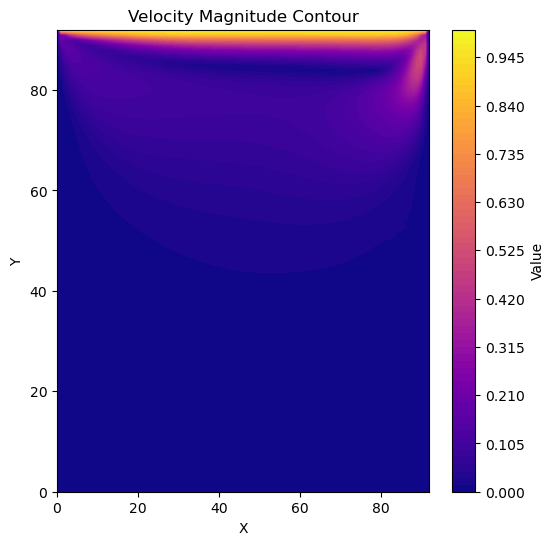

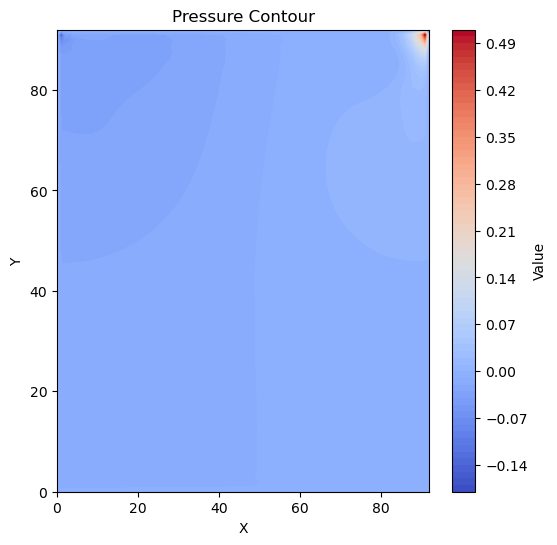

In [85]:
import numpy as np
import matplotlib.pyplot as plt
# 绘制速度大小和压力的等高线图
def plot_contour(data, x, y, title, cmap='viridis'):
    plt.figure(figsize=(6, 6))  # 设置窗口为正方形
    ax = plt.gca()  # 获取当前坐标轴
    plt.contourf(x, y, data, levels=80, cmap=cmap)
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    

    plt.show()



def load_and_combine_data(i):
    # 定义存储数组的列表
    u_data, v_data, p_data = [], [], []

    for idx in range(i + 1):  # 从0到i遍历
        # 加载文件
        u = np.loadtxt(f'u_{idx}.dat')
        v = np.loadtxt(f'v_{idx}.dat')
        p = np.loadtxt(f'p_{idx}.dat')

        # 根据文件后缀处理数据
        if idx == 0:
            u_trimmed = u[:, :-2]
            v_trimmed = v[:, :-2]
            p_trimmed = p[:, :-2]
        elif idx == i:
            u_trimmed = u[:, 2:]
            v_trimmed = v[:, 2:]
            p_trimmed = p[:, 2:]
        else:
            u_trimmed = u[:, 2:-2]
            v_trimmed = v[:, 2:-2]
            p_trimmed = p[:, 2:-2]

        # 添加处理后的数据到列表中
        u_data.append(u_trimmed)
        v_data.append(v_trimmed)
        p_data.append(p_trimmed)

    # 横向拼接所有数据
    u_combined = np.hstack(u_data)
    v_combined = np.hstack(v_data)
    p_combined = np.hstack(p_data)

    return u_combined, v_combined, p_combined

# 示例使用
i = int(input("请输入 i 的值（例如 2）: "))
u_result, v_result, p_result = load_and_combine_data(i)

# 保存拼接后的结果
np.savetxt('u_combined.dat', u_result)
np.savetxt('v_combined.dat', v_result)
np.savetxt('p_combined.dat', p_result)

# 计算速度大小
velocity_magnitude = np.sqrt(u_result**2 +v_result**2)

# 构造网格坐标并反转 y
x = np.linspace(0, velocity_magnitude.shape[1], velocity_magnitude.shape[1])
y = np.linspace(0, velocity_magnitude.shape[0], velocity_magnitude.shape[0])
y = y[::-1]  # 反转 y 值
X, Y = np.meshgrid(x, y)

# 绘制速度等高线图
plot_contour(velocity_magnitude, X, Y, 'Velocity Magnitude Contour', cmap='plasma')

# 绘制压力等高线图
plot_contour(p_result, X, Y, 'Pressure Contour', cmap='coolwarm')
